# Student Number : 18201852 ,18200089
# Student Name : Akin John Thomas, Vinodraj Shivananda

# Step 1: Choosing the Web API for Collecting the Date

We have choosen Twitter API to collect the data. Since, Twitter is an Oauth authenticated application we would be using consumer_key, consumer_seret, access_token, access_token_secret while fetching the data. The afore mentioned keys are as follows:

**consumer_key** = "TGRIRzI63RjRXJwitz5khRJec" <br>
**consumer_secret** = "0sVRnEFv5MH7UCtktacpGmhMzQ9RbtCyz4qcfy1Y9FKmMaDEnv" <br>
**access_token** = "868110503360565248-aVEtf3E0HqM54Yk7JxBZYAHUg09ydWJ" <br>
**access_token_secret** = "eCXNPjSVnGjn1tDaHMB1FsMroI5pgjYzfI77Yax19k2u4" <br>

We are using the python-twitter python package of twtitter to collect the data.

In [6]:
#import the python-twitter python package 
import twitter
#TwitterAPI is an inbuilt class from Python-twitter package having all the necessary creds to authenticate user 
class TwitterAPI:
    def __init__(self, consumer_key, consumer_secret, access_token, access_token_secret):
        self.api = twitter.Api(consumer_key=consumer_key,
                  consumer_secret=consumer_secret,
                  access_token_key=access_token,
                  access_token_secret=access_token_secret,
                  sleep_on_rate_limit=True)

    def API(self):
        return self.api

# Step 2&3: Collecting data from API and Creation of CSV using Python

For Collecting the data we have used the Twitter username of **Google**. However, any users data can be collected by using their respective usernames.

We have 3 methods inside the GETUserTweets class which we are using to **Decoding the data, Processing the tweets, Writing to CSV, Getting the tweets for relevant username**

In [103]:
import twitter
import json
import datetime
import time
import csv
import os.path
import logging
import re
class GETUserTweets(object):
    def __init__(self, screenName=None, consumer_key=None, consumer_secret=None, access_token=None, access_token_key=None):
        '''Constructor
            Parameter:
            screenName: The twitter name of the user whose followers you are fetching.
            consumer_key (str): Your Twitter user's consumer_key.
            consumer_secret (str): Your Twitter user's consumer_secret.
            access_token (str): The oAuth access token value.
            access_token_key (str): The oAuth access token's secret.
        '''

        # Initializing the Logger
        self.logger = logging.getLogger(__name__)
        logging.basicConfig(filename = "LOGS.log", level = logging.DEBUG, 
                            format = "%(asctime)s:%(levelname)s - %(lineno)d:%(message)s")

        # Calling the Twitter API
        try:
            self.api = TwitterAPI(consumer_key, consumer_secret, access_token, access_token_key).API()
        except twitter.error.TwitterError as error:
            self.logger.error(str(error))
            exit(1)

        self.screen_Name = screenName

    def _UnicodeDecode(self, text):
        '''
            Function to decode tweet text
            Parameter:
                text: Tweet text to be decoded
            Returns:
                Decoded text 
        '''
        try:
            return text.encode('utf-8').decode()
        except UnicodeDecodeError:
            return text.encode('utf-8')

    def _ProcessTweets(self, tweet):
        '''
            Function to Process the Status.
            Parameter:
                tweet: Tweet of the User.
            Returns:
                Tweet ID, Text, User Name, Number of Likes, Retweet Count, Time
        '''
        Tweet_ID = str(tweet.id)
        Screen_Name = tweet.user.screen_name
        Tweet_Text = '' if not tweet.text else self._UnicodeDecode(tweet.text)
        Likes = tweet.favorite_count
        Retweet = tweet.retweet_count
        Tweet_Time = datetime.datetime.strptime(tweet.created_at, '%a %b %d %H:%M:%S +0000 %Y')
        Tweet_Time = Tweet_Time.strftime('%Y-%m-%d %H:%M:%S')
        
        
        return [Tweet_ID, Screen_Name, Tweet_Text, Likes, Retweet, Tweet_Time, ]

    def write_toCSV(self, Tweets):
        '''
            Function to Write Tweets to a CSV file with the same name as of the user.
            Parameters:
                Tweets: List of Tweets
            Returns:
                Creates a new CSV file and returns control to the calling function
        '''
        path = "CSV Files/"
        if not os.path.exists(path):
                        os.makedirs(path)
        
        filename = str(self.screen_Name + ".csv")

        with open(os.path.join(path, filename), 'w', encoding="utf-8", newline='') as file:
            w = csv.writer(file)
            w.writerow(['Tweet ID', 'Screen Name', 'Text', 'Likes', 'Retweet Count', 'Tweet Date-Time'])

            for tweet in Tweets:
                tweet_data = self._ProcessTweets(tweet)
                w.writerow(tweet_data)

            file.close()
            

    def GetTweets(self, ScreenName = None):
        '''
            Function to fetch Status from the User Timeline using the ScreenName.
            Parameters:
                ScreenName: The twitter name of the user whose followers you are fetching.
                            Default is None i.e if not passed anything will take for the root user.
            Returns:
                Return back the control to the calling function if a error occurs otherwise calls
                _ProcessStatus() function and passes the UserTimeline
        '''
        UserTimeline = []

        if ScreenName is None:
            ScreenName = self.screen_Name

        try:
            latestTweets = self.api.GetUserTimeline(screen_name = ScreenName, count=200)
            UserTimeline.extend(latestTweets)

            oldTweets = UserTimeline[-1].id - 1
            print("Fetching the Data")
            print("*****************")
            while len(latestTweets) > 0:
                #print ("Getting Tweets Before Tweet ID {}".format(oldTweets))

                latestTweets = self.api.GetUserTimeline(screen_name = ScreenName, count=200, max_id=oldTweets)
                UserTimeline.extend(latestTweets)

                oldTweets = UserTimeline[-1].id - 1
            print("Data Fetching Completed")
                 #print ("{} Tweets Downloaded".format(len(UserTimeline)))
            
        except twitter.error.TwitterError as error:
            self.logger.error(str(error))
            return -1
        self.write_toCSV(UserTimeline)


#### Main Function from which the methods are called to call the API to fetch the data

In [8]:
if __name__ == '__main__':
    # Add your auth tokens here
    consumer_key = "TGRIRzI63RjRXJwitz5khRJec"
    consumer_secret = "0sVRnEFv5MH7UCtktacpGmhMzQ9RbtCyz4qcfy1Y9FKmMaDEnv"

    access_token = "868110503360565248-aVEtf3E0HqM54Yk7JxBZYAHUg09ydWJ"
    access_token_secret = "eCXNPjSVnGjn1tDaHMB1FsMroI5pgjYzfI77Yax19k2u4"
    '''
    if consumer_key == "" or consumer_secret == "" or access_token == "" or access_token_secret == "":
        print ("Please Provide Auth Tokens")
        input("Enter to EXIT.")
    '''
    
    screen_name = str(input("Twitter User Screen Name: @"))

    # Calling the GETUserTweet class from tweets file to access different functions
    api = GETUserTweets(screen_name, consumer_key, consumer_secret, access_token, access_token_secret)
    # Getting User Tweets
    api.GetTweets()
    input("Enter to EXIT.")

Twitter User Screen Name: @Google
Fetching the Data
*****************
Data Fetching Completed
Enter to EXIT.


# Step 4: Load and represent the data using an appropriate data structure

In [9]:
import pandas as pd
#read the created csv file using the pandas library and create it as a data frame
data = pd.read_csv('CSV Files/Google.csv')
df = pd.DataFrame(data)
df.head()

,Tweet ID,Screen Name,Text,Likes,Retweet Count,Tweet Date-Time
0,1109219963192176641,Google,Ever wonder why you're getting so many spam ca...,755,140,2019-03-22 22:27:02
1,1109208540831350785,Google,"🎼 Hey now, you're a Bach star.\n\nWith today's...",853,105,2019-03-22 21:41:38
2,1109190767224991744,Google,"""Every day we work to answer the question: How...",311,44,2019-03-22 20:31:01
3,1109180768088150016,Google,@dfsbaseball Hi there. We'd like to move this ...,1,2,2019-03-22 19:51:17
4,1109175523580801025,Google,@GutstheSaiyan You're welcome. Reach out if yo...,1,0,2019-03-22 19:30:26


In [10]:
#convert the Tweet Date-time Column in string format orginally to proper date time format using to_datetime method
df['Tweet Date-Time'] = pd.to_datetime(df["Tweet Date-Time"])

In [11]:
#The following piece of code creates date, Time and March columns in the dataframe which will later be used for visualization

#write the Tweet Date-Time to a csv file and store only the date in a seperate csv file and a dataframe pointing to it
df_date = df['Tweet Date-Time'].dt.date
df_date.to_csv("CSV Files/Date.csv", index= False, header = ['Date'])
df_date.head()
df_d = pd.read_csv("CSV Files/Date.csv")

#store the time in a different column.
df_time = df['Tweet Date-Time'].dt.time
df_time = df_time.to_csv("CSV Files/Time.csv", index= False, header = ["Time"])
df_t = pd.read_csv("CSV Files/Time.csv")

#store Months in a different column.
df_month= df['Tweet Date-Time'].dt.strftime('%b')
df_month.to_csv("CSV Files/Month.csv", index= False, header = ['Month'])
df_m = pd.read_csv("CSV Files/Month.csv")

#concatenate all the dataframes pointing to Date, Time and Month
df = pd.concat([df, df_d, df_t, df_m], axis = 1)
df.head()

,Tweet ID,Screen Name,Text,Likes,Retweet Count,Tweet Date-Time,Date,Time,Month
0,1109219963192176641,Google,Ever wonder why you're getting so many spam ca...,755,140,2019-03-22 22:27:02,2019-03-22,22:27:02,Mar
1,1109208540831350785,Google,"🎼 Hey now, you're a Bach star.\n\nWith today's...",853,105,2019-03-22 21:41:38,2019-03-22,21:41:38,Mar
2,1109190767224991744,Google,"""Every day we work to answer the question: How...",311,44,2019-03-22 20:31:01,2019-03-22,20:31:01,Mar
3,1109180768088150016,Google,@dfsbaseball Hi there. We'd like to move this ...,1,2,2019-03-22 19:51:17,2019-03-22,19:51:17,Mar
4,1109175523580801025,Google,@GutstheSaiyan You're welcome. Reach out if yo...,1,0,2019-03-22 19:30:26,2019-03-22,19:30:26,Mar


In [12]:
#drop the Tweeet Date-Time column since it is no longer useful and the same information is available in other columns
df  = df.drop(["Tweet Date-Time"], axis = 1)

In [13]:
#select all the rows from Text Column for Preprocessing
string = list(df.iloc[:]["Text"])
string
df = df.drop(columns = "Text")

The emoji's used in the post come along with the Text data. When opened in an excel file all the emoji's seem to have some special characters which has to be preprocessed for further analysis.

In [14]:
#The following piece of code removes any emoji's present in the tweet made. 
str_without_emo = []
import re
for i in string:
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF"  
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF"  
        u"\U0001F300-\U0001F64F"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F600-\U0001F64F"
        u"\u2600-\u26FF\u2700-\u27BF"
        u"\U0001F98C"
        u"\U0001F914-\U0001F917"
        u"\U0001F989""]+",flags=re.UNICODE)
    str_without_emo.append(emoji_pattern.sub(r'', i))

In [15]:
#write the lists without emoji's/unicode to a new file
df_Text = pd.DataFrame(str_without_emo, columns=["Text"])
df_Text.to_csv('Text.csv', index=False)
data_2 = pd.read_csv('Text.csv')
df_2 = pd.DataFrame(data_2)

df_combined has all the columns from df dataframe and df_2 having the pre-processed text column

In [104]:
#describe the data present in the csv file
df_combined = pd.concat([df, df_2], axis = 1)
df_combined.to_csv("CSV Files/combined.csv", index= False)
df_combined.describe()

,Tweet ID,Likes,Retweet Count
count,3.217000e+03,3217.000000,3217.000000
mean,1.089860e+18,81.604601,50.867889
std,1.309818e+16,945.095713,1681.823913
min,1.067096e+18,0.000000,0.000000
25%,1.077670e+18,0.000000,0.000000
50%,1.091338e+18,0.000000,0.000000
75%,1.102611e+18,1.000000,0.000000
max,1.109220e+18,48816.000000,92735.000000


Using re package to remove any punctuations present in the tweets

In [18]:
#remove punctuations
import re
p = re.compile(r'[^\w\s]+')
df_combined['Text'] = [p.sub('', x) for x in df_combined['Text'].tolist()]

In [19]:
#results after removing punctuations
df_combined.head()

,Tweet ID,Screen Name,Likes,Retweet Count,Date,Time,Month,Text
0,1109219963192176641,Google,755,140,2019-03-22,22:27:02,Mar,Ever wonder why youre getting so many spam cal...
1,1109208540831350785,Google,853,105,2019-03-22,21:41:38,Mar,Hey now youre a Bach star\n\nWith todays Bach...
2,1109190767224991744,Google,311,44,2019-03-22,20:31:01,Mar,Every day we work to answer the question How c...
3,1109180768088150016,Google,1,2,2019-03-22,19:51:17,Mar,dfsbaseball Hi there Wed like to move this con...
4,1109175523580801025,Google,1,0,2019-03-22,19:30:26,Mar,GutstheSaiyan Youre welcome Reach out if you h...


# Step 5: Visualizing the Data

Displaying the top 30 frequently used words in Frequency Distribution Chart

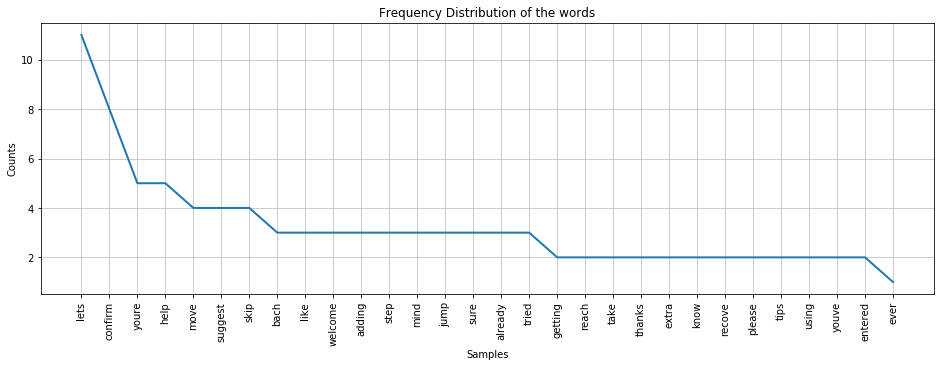

In [101]:
import nltk
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
top_N = 30
from wordcloud import WordCloud, STOPWORDS
txt = str(df_combined['Text'].str.lower()) #normalize all the words to lower case
words = nltk.tokenize.word_tokenize(txt) #split th words individually
stopwords = nltk.corpus.stopwords.words('english') #remove the stop words present in the text 
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords and len(w) > 3) #display the frequent word used whose length is more than 3
plt.figure(figsize=(16,5))
plt.title("Frequency Distribution of the words")
words_except_stop_dist.plot(top_N)

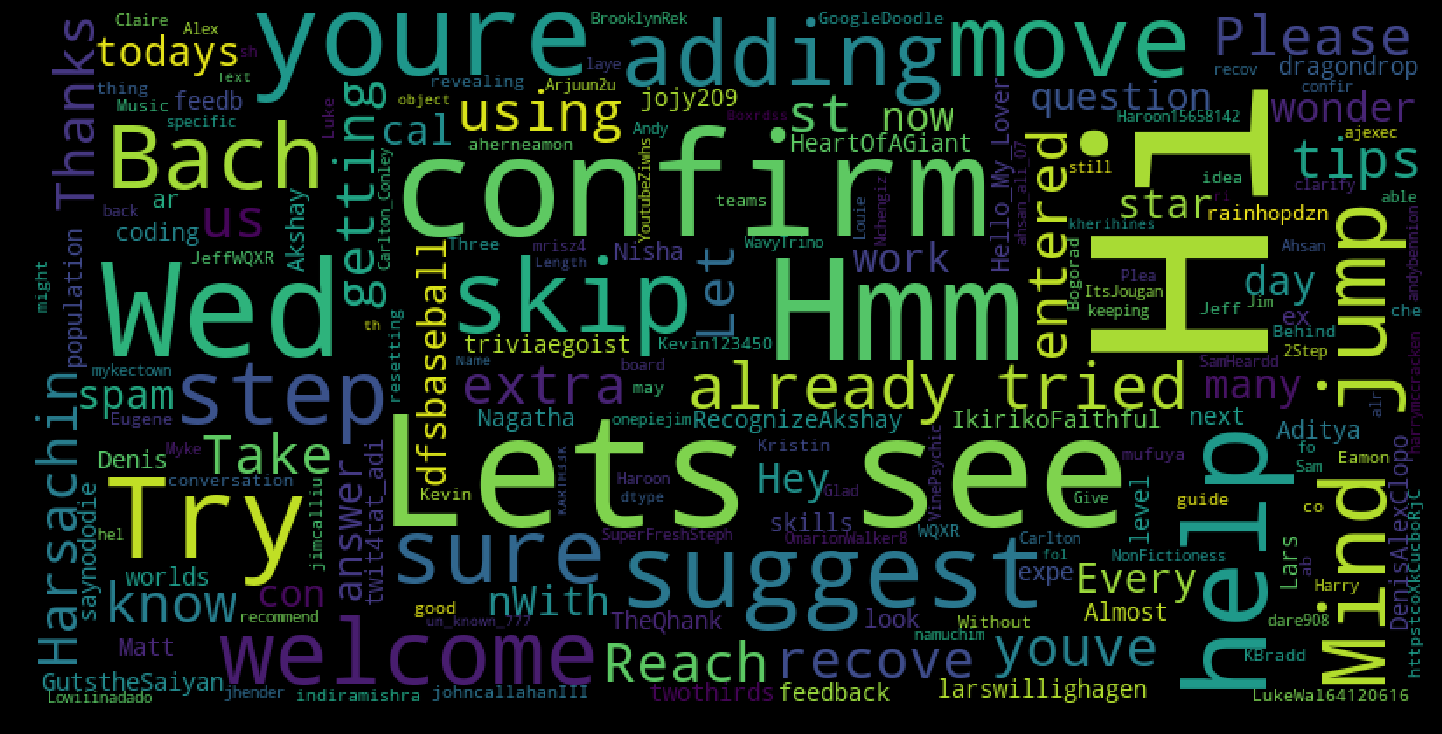

In [74]:
#to display frequencies using word cloud
from wordcloud import WordCloud
df_text_column = str(df_combined["Text"]) #remove the stop words present in the text 
wordcloud = WordCloud(width=800, height=400).generate(df_text_column)
plt.figure(figsize = (20,10),facecolor="k")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

The above image shows wordcloud with stop words in it 

In [22]:
#convert the Tweet Date-time Column in string format orginally to proper date time format using to_datetime method
df_combined['Year-Month'] = pd.to_datetime(df_combined['Date']).dt.to_period('M')

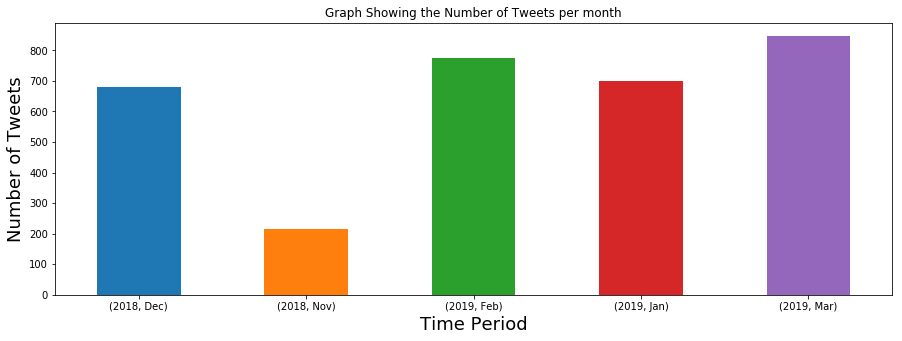

In [95]:
#Number of Tweets made per month
groups = df_combined.groupby([df_combined['Year-Month'].dt.year.rename('year'), df_combined['Year-Month'].dt.strftime('%b').rename('month')])['Tweet ID'].count()
groups.plot.bar(figsize=(15, 5))
groups.sort_values(ascending= False)
plt.xticks(rotation=0)
plt.xlabel("Time Period", fontsize=18)
plt.ylabel("Number of Tweets", fontsize=18)
plt.title("Graph Showing the Number of Tweets per month")
plt.show()

Text(0.5,1,'Pie Chart Displaying proportion of tweet counts by month')

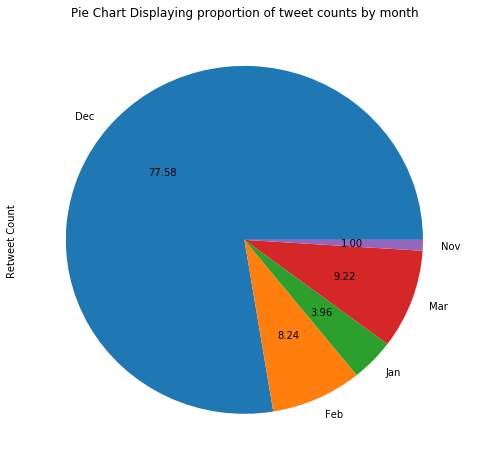

In [91]:
#Proportion of the tweets made in the last 6 Months
groups = df_combined.groupby(df_combined['Year-Month'].dt.strftime('%b').rename('month'))["Retweet Count"].sum()
groups.plot(kind = 'pie', autopct='%.2f', figsize=(8,8))
plt.title("Pie Chart Displaying proportion of tweet counts by month")

From the above Pie Chart we can infer that maximum proportion of the tweets were made in December

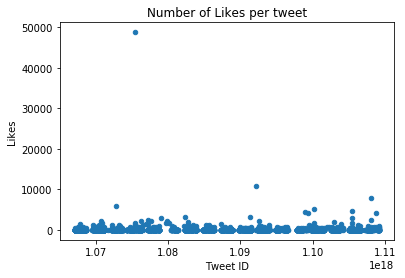

<Figure size 720x720 with 0 Axes>

In [102]:
#Number of Likes each Tweet ID got.
df_combined.plot.scatter(x = 'Tweet ID', y = 'Likes')
plt.title("Number of Likes per tweet")
plt.figure(figsize=(10,10))
plt.show()

Clearly from the above plot it shows that the Tweet ID having the highest tweets stands out from the rest of the tweets made

## Conclusion

From the above visualisations we can infer that the amount of tweets made using "Hi" is most used to address other users and no matter how many tweets are made, the Likes for the tweets almost fall under the same count but only few tweets get most likes. The amounts of retweets made in the month of December are more when compared to any month since many twitter users are active during this period. 

We can conclude that tweets are made at a constant rate from analysing the tweets made per month.